# Initial Value Problem

**강좌**: *수치해석 프로젝트*

## Initial Value Problem
초기 조건이 주어진 상미분 방정식은 다음과 같이 표현할 수 있다.

$$
\frac{dy}{dt}=f(y,t), y(0) = y_0
$$

시간 $t$ 에서 해를 구하기 위해서는 미분방정식을 적분해서 구할 수 있다. 

### Explicit Euler Method
Taylor Series를 이용하면 다음과 같이 근사할 수 있다.

$$
y(t+\Delta t) = y(t) + \Delta t \frac{dy}{dt} + O((\Delta t)^2)
$$

시간 $t_n$ 일 때 $y$를 $y_n$ 이고 시간 간격 $h=\Delta t$ 로 하면 다음과 같이 근사할 수 있다.

$$
y_{n+1} = y_n + h f(y_n, t_n)
$$

#### 정확도
$[t_n, t_{n+1}]$ 구간에 대해서 Euler Method의 정확도는 $O(h^2)$ 이다. 

전 시간 영역에 대해서 오차가 누적되므로 1차 정확도 ($O(h)$)가 된다.

#### 예제
Newton의 Cooling 법칙은 다음과 같다.

$$
\frac{dT}{dt} = k(T-T_m)
$$

열전도율 $k=-2.0$ 이고 주변 온도가 $T_m=15$ 도 이다. 막 내린 커피를 담은 컵의 온도가 $T_0=30$ 도 일 때 
시간에 따른 커피의 온도를 구하라.

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

import numpy as np

plt.style.use('ggplot')
plt.rcParams['figure.dpi'] = 150

In [2]:
def expliciteuler(df, tspan, y0, dt=0.1):
    """
    Explicit Euler Method (ODE)
    
    Parameters
    ----------
    df : function
        Derivative
    tpan : tuple
        initial and final time
    y0 : float
        initial guess
    dt : float
        Time step size
    
    Return
    ------
    t : array
        Time series
    y : array
        solutions
    """    
    # 시간 Array
    t0, te = tspan
    t = np.arange(t0, te+1e-10, dt)
    
    # Solution Array
    y = np.empty_like(t)
    y[0] = y0
    
    # Euler Explicit
    for i, ti in enumerate(t):
        if i > 0:
            y[i] = y[i-1] + dt*df(t[i-1], y[i-1])
            
    return t, y

(-10.0, 40.0)

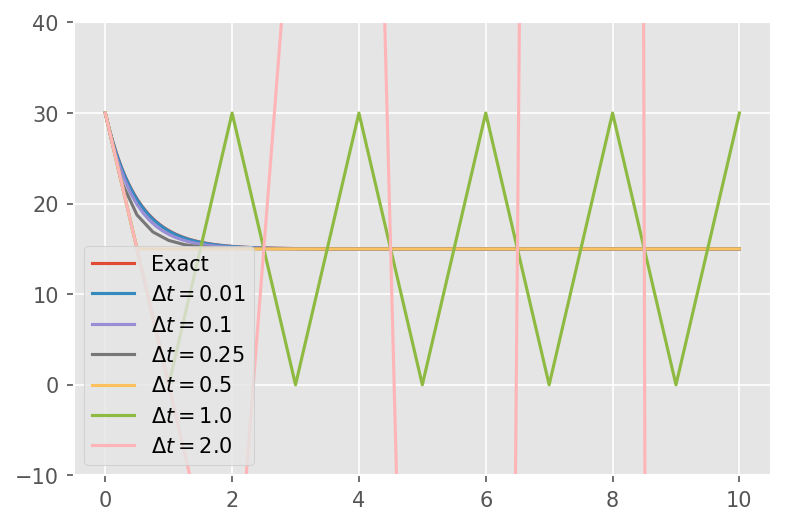

In [3]:
# Derivative
k = -2.0

def f(t, y):
    return k*(y-15)

# Plots
t, y = expliciteuler(f, [0, 10], 30, dt=0.01)
plt.plot(t, 15 + 15*np.exp(k*t), )
plt.plot(t, y)

t, y = expliciteuler(f, [0, 10], 30, dt=0.1)
plt.plot(t, y)

t, y = expliciteuler(f, [0, 10], 30, dt=0.25)
plt.plot(t, y)

t, y = expliciteuler(f, [0, 10], 30, dt=0.5)
plt.plot(t, y)

t, y = expliciteuler(f, [0, 10], 30, dt=1.0)
plt.plot(t, y)

t, y = expliciteuler(f, [0, 10], 30, dt=2.0)
plt.plot(t, y)

plt.legend(['Exact', r'$\Delta t=0.01$', r'$\Delta t=0.1$', r'$\Delta t=0.25$', 
            r'$\Delta t=0.5$', r'$\Delta t=1.0$', r'$\Delta t=2.0$'])

plt.ylim(-10, 40)

#### 안정성
시간 간격에 따라 정확도 뿐 아니라 알고리즘이 발산할 수 있다. 이는 수치 안정성과 관계된다.

안정성을 분석하기 위해 Model problem을 생각한다.

$$
\frac{dy}{dt}=f(y,t) = f(y_0, t_0) + (t-t_0)f_t + (y - y_0) f_y + ... = \lambda y + Others
$$
$$
\frac{dy}{dt}= \lambda y, ~~~~\lambda = \lambda_R + i \lambda_i
$$

$\lambda_R < 0$ 인 경우 이 미분방정식은 해가 제한되어 (bounded) 있다.

Explicit Euler에 적용하면 다음과 같다.

$$
y_{n+1} = y_n(1 + \lambda h)
$$

즉

$$
y_n = y_0 (1 + \lambda h)^n = y_0 \sigma^n
$$

여기서 $|\sigma| < 1$ 일 때 수치 기법의 해가 발산하지 않는다.

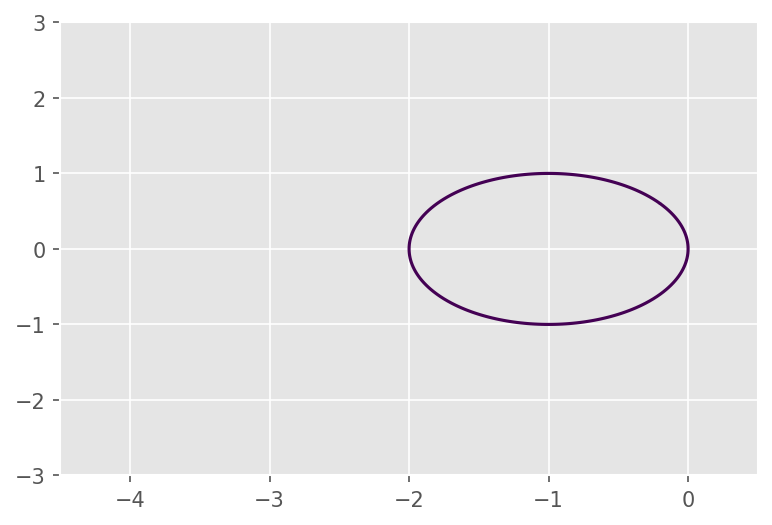

In [4]:
# Make grid
x = np.linspace(-4.5, 0.5, 201)
y = np.linspace(-3, 3, 201)
X, Y = np.meshgrid(x, y)
z = X + Y*1j

# Amplication factor of Explicit Euler (z=lambda h)
sig = 1 + z

plt.contour(X,Y,abs(sig), levels=[1])

## 더 정확한 Explicit Method
정확도를 높이기 위해서 2가지 방법이 고려된다.

- Multi-stage method
  - 한 시간 간격 (step) 을 전진하기 위해 여러 Stage를 계산함
  
- Multi-step method
  - 한 시간 간격을 전진하기 위해 이전 여러 step의 결과를 활용함
  
이들은 모두 Taylor expansion에서 고차항을 근사한다.

### Runge Kutta Method
Runge Kutta Method는 대표적인 Multi-stage method 이다.
가장 기본적인 형태는 다음과 같다.

#### 4차 정확도 Runge Kutta Method
$$
\begin{align}
k_1 &= h f(y_n, t_n) \\
k_2 &= h f(y_n + \frac{1}{2}k_1, t+\frac{h}{2})\\
k_3 &= h f(y_n + \frac{1}{2}k_2, t+\frac{h}{2})\\
k_4 &= h f(y_n + k_3, t_n + h)\\
y_{n+1} &= y_n + \frac{1}{6} k_1 + \frac{1}{3} (k_2+k_3) + \frac{1}{6} k_4.
\end{align}
$$

- 개념적으로 4 stage에서 구한 기울기에 의한 변화량을 가중 평균하는 개념이다.

:::{figure-md} rk4-fig
<img src="https://upload.wikimedia.org/wikipedia/commons/7/7e/Runge-Kutta_slopes.svg" alt="rk4-fig">

Runge Kutta Method (From Wikipedia)
:::

- 이 기법은 4차 정확도를 갖는다.

- 이 기법의 Stability는 다음과 같다.

$$
\sigma = 1 + \lambda h + \frac{1}{2} (\lambda h)^2 + \frac{1}{6} (\lambda h)^3 + \frac{1}{24} (\lambda h)^4
$$

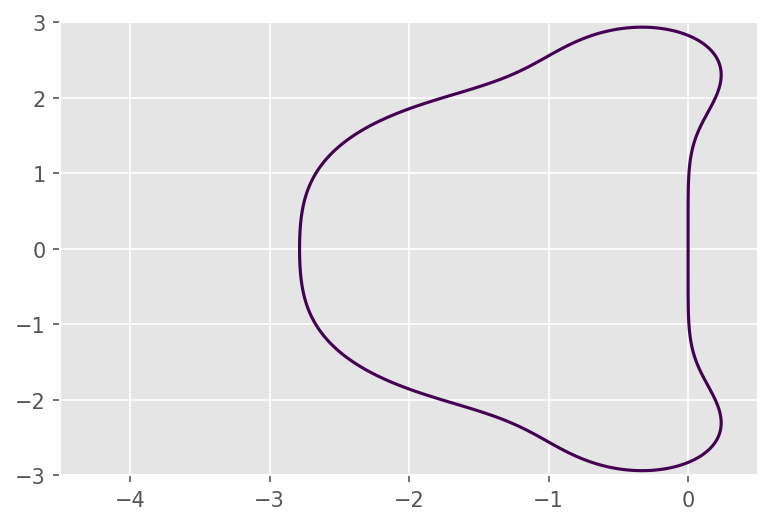

In [5]:
# Make grid
x = np.linspace(-4.5, 0.5, 201)
y = np.linspace(-3, 3, 201)
X, Y = np.meshgrid(x, y)
z = X + Y*1j

# Amplication factor of RK4 (z=lambda h)
sig = 1 + z + 0.5*z**2 + z**3/6 + z**4/24

plt.contour(X,Y,abs(sig), levels=[1])

#### 예제
Spring-Mass system의 운동방정식은 다음과 같다.

$$
ma = -kx, ~~~a=\frac{d^2x}{dt^2}.
$$

즉

$$
m \ddot{x} + kx=0.
$$

이를 수치적으로 해석하기 위해서는 다음과 같이 1계 미분방정식으로 만든다.

$$
\frac{d}{dt}{\left [
\begin{matrix}
x \\ \dot{x}
\end{matrix}
\right ]}
=
\left [
\begin{matrix}
0 & 1 \\
-k/m & 0
\end{matrix}
\right ]
\left [
\begin{matrix}
x \\ \dot{x}
\end{matrix}
\right ]
$$

$m=1, k=16$ 일 때 해석하시오

In [5]:
def rk4(df, tspan, y0, dt=0.1):
    """
    4th Order Runge-Kutta Method (ODE)
    
    Parameters
    ----------
    df : function
        Derivative
    tpan : tuple
        initial and final time
    y0 : array
        initial guess
    dt : float
        Time step size
    
    Return
    ------
    t : array
        Time series
    y : array
        solutions
    """    
    # 시간 Array
    t0, te = tspan
    t = np.arange(t0, te+1e-10, dt)
    
    # Solution array
    y = np.empty((len(y0), len(t)))
    y[:, 0] = y0
    
    # Runge Kutta method
    for i, ti in enumerate(t):
        if i > 0:
            k1 = dt*df(t[i-1], y[:, i-1])
            k2 = dt*df(t[i-1] + 0.5*dt, y[:, i-1] + 0.5*k1)
            k3 = dt*df(t[i-1] + 0.5*dt, y[:, i-1] + 0.5*k2)
            k4 = dt*df(t[i-1] + dt, y[:, i-1] + k3)
            
            y[:, i] = y[:, i-1] + (k1 + 2*k2 + 2*k3 + k4) / 6
            
    return t, y

In [6]:
def expliciteuler_v1(df, tspan, y0, dt=0.1):
    """
    Explicit Euler Method (ODE), High-order variant
    
    Parameters
    ----------
    df : function
        Derivative
    tpan : tuple
        initial and final time
    y0 : array
        initial guess
    dt : float
        Time step size
    
    Return
    ------
    t : array
        Time series
    y : array
        solutions
    """    
    # 시간 Array
    t0, te = tspan
    t = np.arange(t0, te+1e-10, dt)
    
    # Solution array
    y = np.empty((len(y0), len(t)))
    y[:, 0] = y0
    
    # Euler Explicit
    for i, ti in enumerate(t):
        if i > 0:
            y[:, i] = y[:, i-1] + dt*df(t[i-1], y[:, i-1])
            
    return t, y

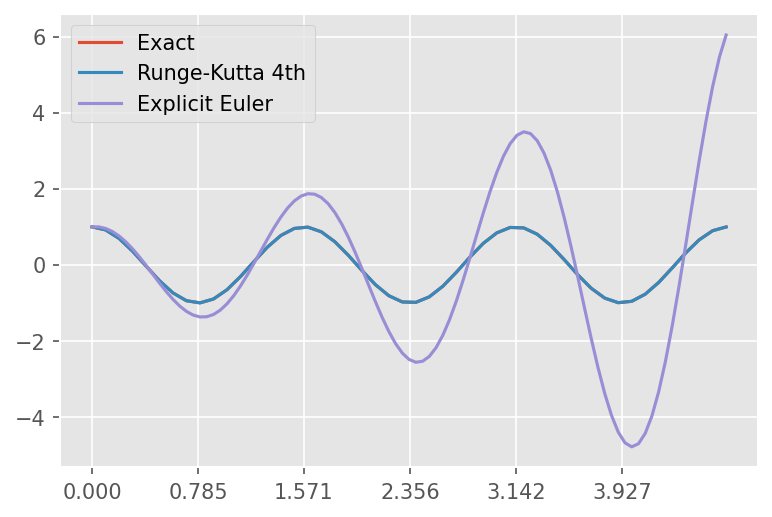

In [7]:
def f(t, y):
    return np.array([y[1], -16*y[0]])

t, y = rk4(f, [0, 1.5*np.pi], [1, 0], dt=0.1)
plt.plot(t, np.cos(4*t))
plt.plot(t, y[0])

t, y = expliciteuler_v1(f, [0, 1.5*np.pi], [1, 0], dt=0.05)
plt.plot(t, y[0])

plt.xticks(np.arange(6)*np.pi/4)
plt.legend(['Exact', 'Runge-Kutta 4th', 'Explicit Euler'])

#### Adaptive Runge Kutta Method
- 2개의 정확도를 갖는 Runge Kutta 기법을 비교해서 상대 오차를 계산함
   - $\tilde{y}_{n+1}$ 는 더 정확한 기법
   - $y_{n}$ 의 오차 : $Error \approx | y_{n+1} - \tilde{y}_{n+1} |$
   
   
- 시간 간격 $h$ 조절 
   - $y_{n}$ 오차는 $Error = O(h^{p+1})$ 이다.
   - $y_{n}$ 오차를 $\epsilon$ 까지 줄이려면 $h_{opt} = h (\frac{\epsilon}{Error})^{1/(p+1)}$
       * $\epsilon = O(h_{opt}^{p+1})$ 이다.
       
   
- Embeded Runge Kutta Method
   - 기존 Stage에 일부 Stage를 추가해서 정확도가 다른 Runge Kutta Approximation을 동시에 계산함
   - Runge-Kutta-Fehlberg method (RK45)
   - 여러 기법들이 존재함

$$
\begin{align}
k_1 &= h f(y_n, t_n) \\
k_2 &= h f(y_n + \frac{1}{4}k_1, t+\frac{1}{4}h)\\
k_3 &= h f(y_n + \frac{3}{32}k_1 + \frac{9}{32}k_2, t+\frac{3}{8}h)\\
k_4 &= h f(y_n + \frac{1932}{2197}k_1 - \frac{7200}{2197}k_2 + \frac{7296}{2197}k_3, t+\frac{12}{13}h)\\
k_5 &= h f(y_n + \frac{439}{216}k_1 - 8k_2 + \frac{3680}{513}k_3 - \frac{845}{4104} k_4, t+ h)\\
k_6 &= h f(y_n - \frac{8}{27}k_1 + 2 k_2 - \frac{3544}{2565}k_3 + \frac{1859}{4104} k_4- \frac{11}{40} k_5, t+ \frac{1}{2}h)\\
y_{n+1} &= y_n + \frac{25}{216} k_1 + \frac{1408}{2565} k_3 + \frac{2197}{4104} k_4 - \frac{1}{5} K_5\\
\tilde{y}_{n+1} &= y_n + \frac{16}{135} k_1 + \frac{6656}{12825} k_3 + \frac{28561}{56430} k_4 - \frac{9}{50} K_5 + \frac{2}{55} k_6.
\end{align}
$$

In [9]:
def rk45(df, tspan, y0, dt=1e-3, atol=1e-6, rtol=1e-3, sfac=0.9):
    """
    Runge-Kutta-Fehlberg method (RK45)
    
    Parameters
    ----------
    df : function
        Derivative
    tpan : tuple
        initial and final time
    y0 : array
        initial guess
    dt : float
        Time step size
    atol : float
        Absolute tolerance
    rtol : float
        Relative tolerance
    sfac : float
        Satefy factor
    
    Return
    ------
    t : array
        Time series
    y : array
        solutions
    """
    # 시간 Array
    t0, te = tspan
    
    t, y = [], []
    
    y.append(y0)
    t.append(t0)
    ti, yi = t0, y0
    
    while ti < te:
        k1 = dt*df(ti         , yi)
        k2 = dt*df(ti+ 0.25*dt, yi +     0.25*k1)
        k3 = dt*df(ti+0.375*dt, yi +     3/32*k1 +      9/32*k2)
        k4 = dt*df(ti+12/13*dt, yi +1932/2197*k1 -7200/2197*k2  + 7296/2197*k3)
        k5 = dt*df(ti+      dt, yi +  439/216*k1 -         8*k2 +  3680/513*k3 -  845/4104*k4)
        k6 = dt*df(ti+  0.5*dt, yi -     8/27*k1 +         2*k2 - 3544/2565*k3 + 1859/4104*k4 - 11/40*k5)
        
        yn = yi + 25/216*k1 +  1408/2565*k3 +   2197/4104*k4 - 1/5*k5
        yp = yi + 16/135*k1 + 6656/12825*k3 + 28561/56430*k4 -9/50*k5 + 2/55*k6
        
        #err = np.linalg.norm(yn - yp)
        #tol = atol + rtol*max(np.linalg.norm(yn), np.linalg.norm(yp))
        err = yn - yp
        tol = atol + rtol*np.maximum(np.abs(yn), np.abs(yi))
        en = np.linalg.norm(err/tol)

        if en < 1.0:
            yi = yn
            ti += dt
            y.append(yi)
            t.append(ti)
            
        ratio = sfac*(en)**-0.2        
        dt *= ratio
                
    return np.array(t), np.array(y).T

Number of evaluation:  82


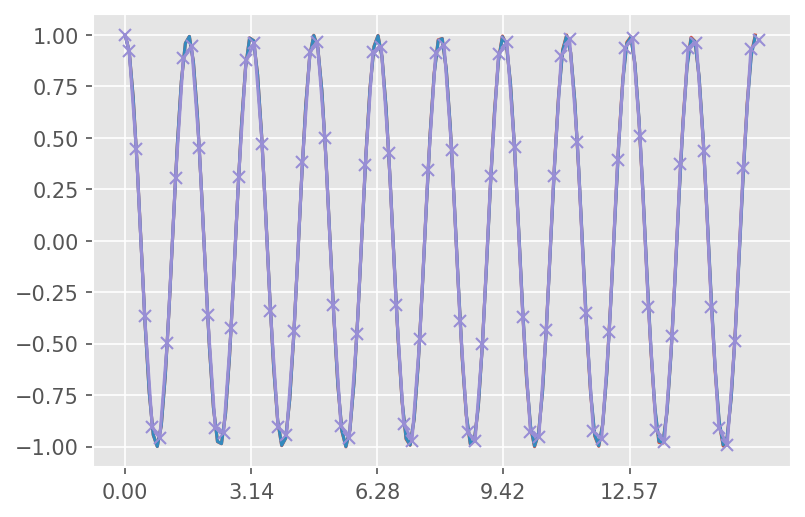

In [10]:
t, y = rk4(f, [0, 5*np.pi], [1, 0], dt=0.1)
plt.plot(t, np.cos(4*t))
plt.plot(t, y[0])

t, y = rk45(f, [0, 5*np.pi], [1,0], dt=0.1, atol=1e-6, rtol=1e-3)
plt.plot(t, y[0], marker='x')
plt.xticks(np.arange(5)*np.pi)
print("Number of evaluation: ", t.shape[0])

## Scipy 활용

`scipy.integrate` 모듈은 수치 적분과 관련된 다양한 알고리듬을 제공한다.

**참고**
* https://scipy-lectures.org/intro/scipy.html#numerical-integration-scipy-integrate
* https://docs.scipy.org/doc/scipy/tutorial/integrate.html

### Initial value problem
`solve_ivp` 함수는 다양한 고성능 Multi-stage 및 Multi-step method를 제공한다. 특히 Adaptive time step을 지원하므로 시간 간격을 알아서 조정한다.

In [11]:
from scipy.integrate import solve_ivp

In [12]:
solve_ivp?

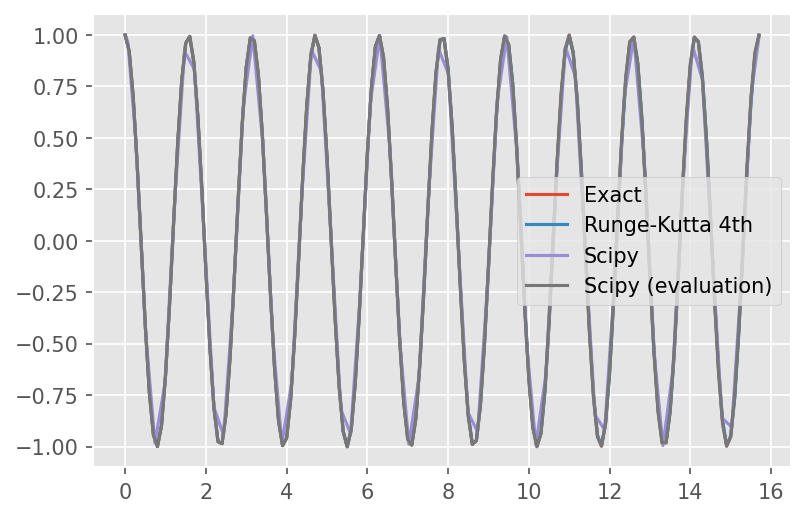

In [13]:
t, y = rk4(f, [0, 5*np.pi], [1, 0], dt=0.1)
plt.plot(t, np.cos(4*t))
plt.plot(t, y[0])

sol = solve_ivp(f, [0, 5*np.pi], [1, 0])
plt.plot(sol.t, sol.y[0])

sol = solve_ivp(f, [0, 5*np.pi], [1, 0], t_eval=t)
plt.plot(sol.t, sol.y[0])

plt.legend(['Exact', 'Runge-Kutta 4th', 'Scipy', 'Scipy (evaluation)'])